# TP COMPRESSION

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt

## **Transformation** dans un autre domaine

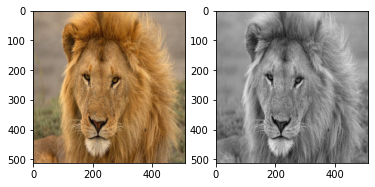

In [3]:
# Chargement de l'image
filename = './figures/06.png'
IMAGE_bgr = cv2.imread(filename)
IMAGE_rgb = cv2.cvtColor(IMAGE_bgr, cv2.COLOR_BGR2RGB)
#IMAGE_nb = cv2.cvtColor(IMAGE_rgb, cv2.COLOR_RGB2GRAY)
IMAGE_nb = cv2.imread(filename,0)

plt.subplot(121)
plt.imshow(IMAGE_rgb)
plt.subplot(122)
plt.imshow(IMAGE_nb, cmap='gray')
plt.show()

Text(0.5, 1.0, "Histogramme de l'image #6")

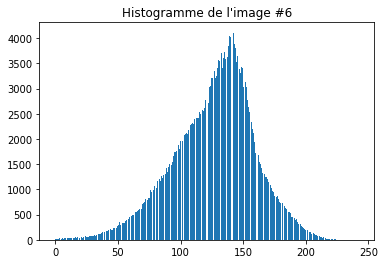

In [4]:
hist_IMAGE_nb, bin_edges_IMAGE_nb = np.histogram(IMAGE_nb, bins=255)
bin_edges_IMAGE_nb = bin_edges_IMAGE_nb[:-1:]
plt.bar(bin_edges_IMAGE_nb, hist_IMAGE_nb)
plt.title("Histogramme de l'image #6")

# **Transformation** dans un autre domaine : **DCT**

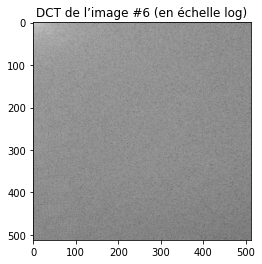

In [5]:
IMAGE_dct = cv2.dct(IMAGE_nb.astype(float)) # DCT -> notez la conversion en float
a = np.log(np.abs(IMAGE_dct))
plt.imshow(np.log(np.abs(IMAGE_dct)), 'gray')
plt.title("DCT de l’image #6 (en échelle log)")
plt.show()

# Matrice de corrélation + l'afficher (cf. cours)

Text(0.5, 1.0, "Histogramme de l'image #6 en DCT")

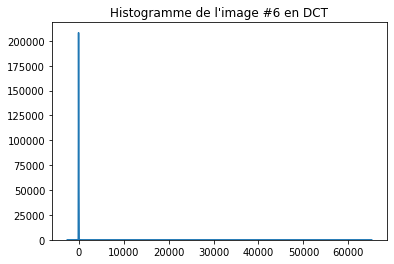

In [6]:
hist_IMAGE_dct, bin_edges_IMAGE_dct = np.histogram(IMAGE_dct, bins = 1000)
bin_edges_IMAGE_dct = bin_edges_IMAGE_dct[:-1:]
plt.bar(bin_edges_IMAGE_dct, hist_IMAGE_dct)
plt.plot(bin_edges_IMAGE_dct,hist_IMAGE_dct)
plt.title("Histogramme de l'image #6 en DCT")

## **Codage** et **quantification** des coefficients

In [9]:
taux = 0.15
Z = [[16, 11, 10, 16, 24,  40,  51,  61],
    [12, 12, 14, 19, 26,  58,  60,  55],
    [14, 13, 16, 24, 40,  57,  69,  56],
    [14, 17, 22, 29, 51,  87,  80,  62],
    [18, 22, 37, 56, 68,  109, 103, 77],
    [24, 35, 55, 64,  81,  104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]]





## **Décodage** et **décompression** de l'image